In [5]:
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
%matplotlib inline

In [6]:
thr_seq = []
thr_par_inn = []
thr_par_out = []
r_range = [400, 1000, 1500]
for i in range(1,5):
    sequential = defaultdict(lambda: defaultdict(list))
    for r in r_range:
        name = 'cmake-build-debug/' + str(i) + '_seq_block_m_{}.txt'.format(r)
        with open(name, 'r') as inp:
            for line in inp.read().split('\n'):
                if not line:
                    continue
                matrix_size, time = line.split(' ')
                sequential[r]['x'].append(int(matrix_size))
                sequential[r]['y'].append(int(time))
    thr_seq.append(sequential)
    parallel_inner = defaultdict(lambda: defaultdict(list))
    for r in r_range:
        name = 'cmake-build-debug/' + str(i) + '_parallel_inner_block_m_{}.txt'.format(r)
        with open(name, 'r') as inp:
            for line in inp.read().split('\n'):
                if not line:
                    continue
                matrix_size, time = line.split(' ')
                parallel_inner[r]['x'].append(int(matrix_size))
                parallel_inner[r]['y'].append(int(time))
    thr_par_inn.append(parallel_inner)
    parallel_outer = defaultdict(lambda: defaultdict(list))
    for r in r_range:
        name = 'cmake-build-debug/' + str(i) + '_parallel_outer_block_m_{}.txt'.format(r)
        with open(name, 'r') as inp:
            for line in inp.read().split('\n'):
                if not line:
                    continue
                matrix_size, time = line.split(' ')
                parallel_outer[r]['x'].append(int(matrix_size))
                parallel_outer[r]['y'].append(int(time))
    thr_par_out.append(parallel_outer)

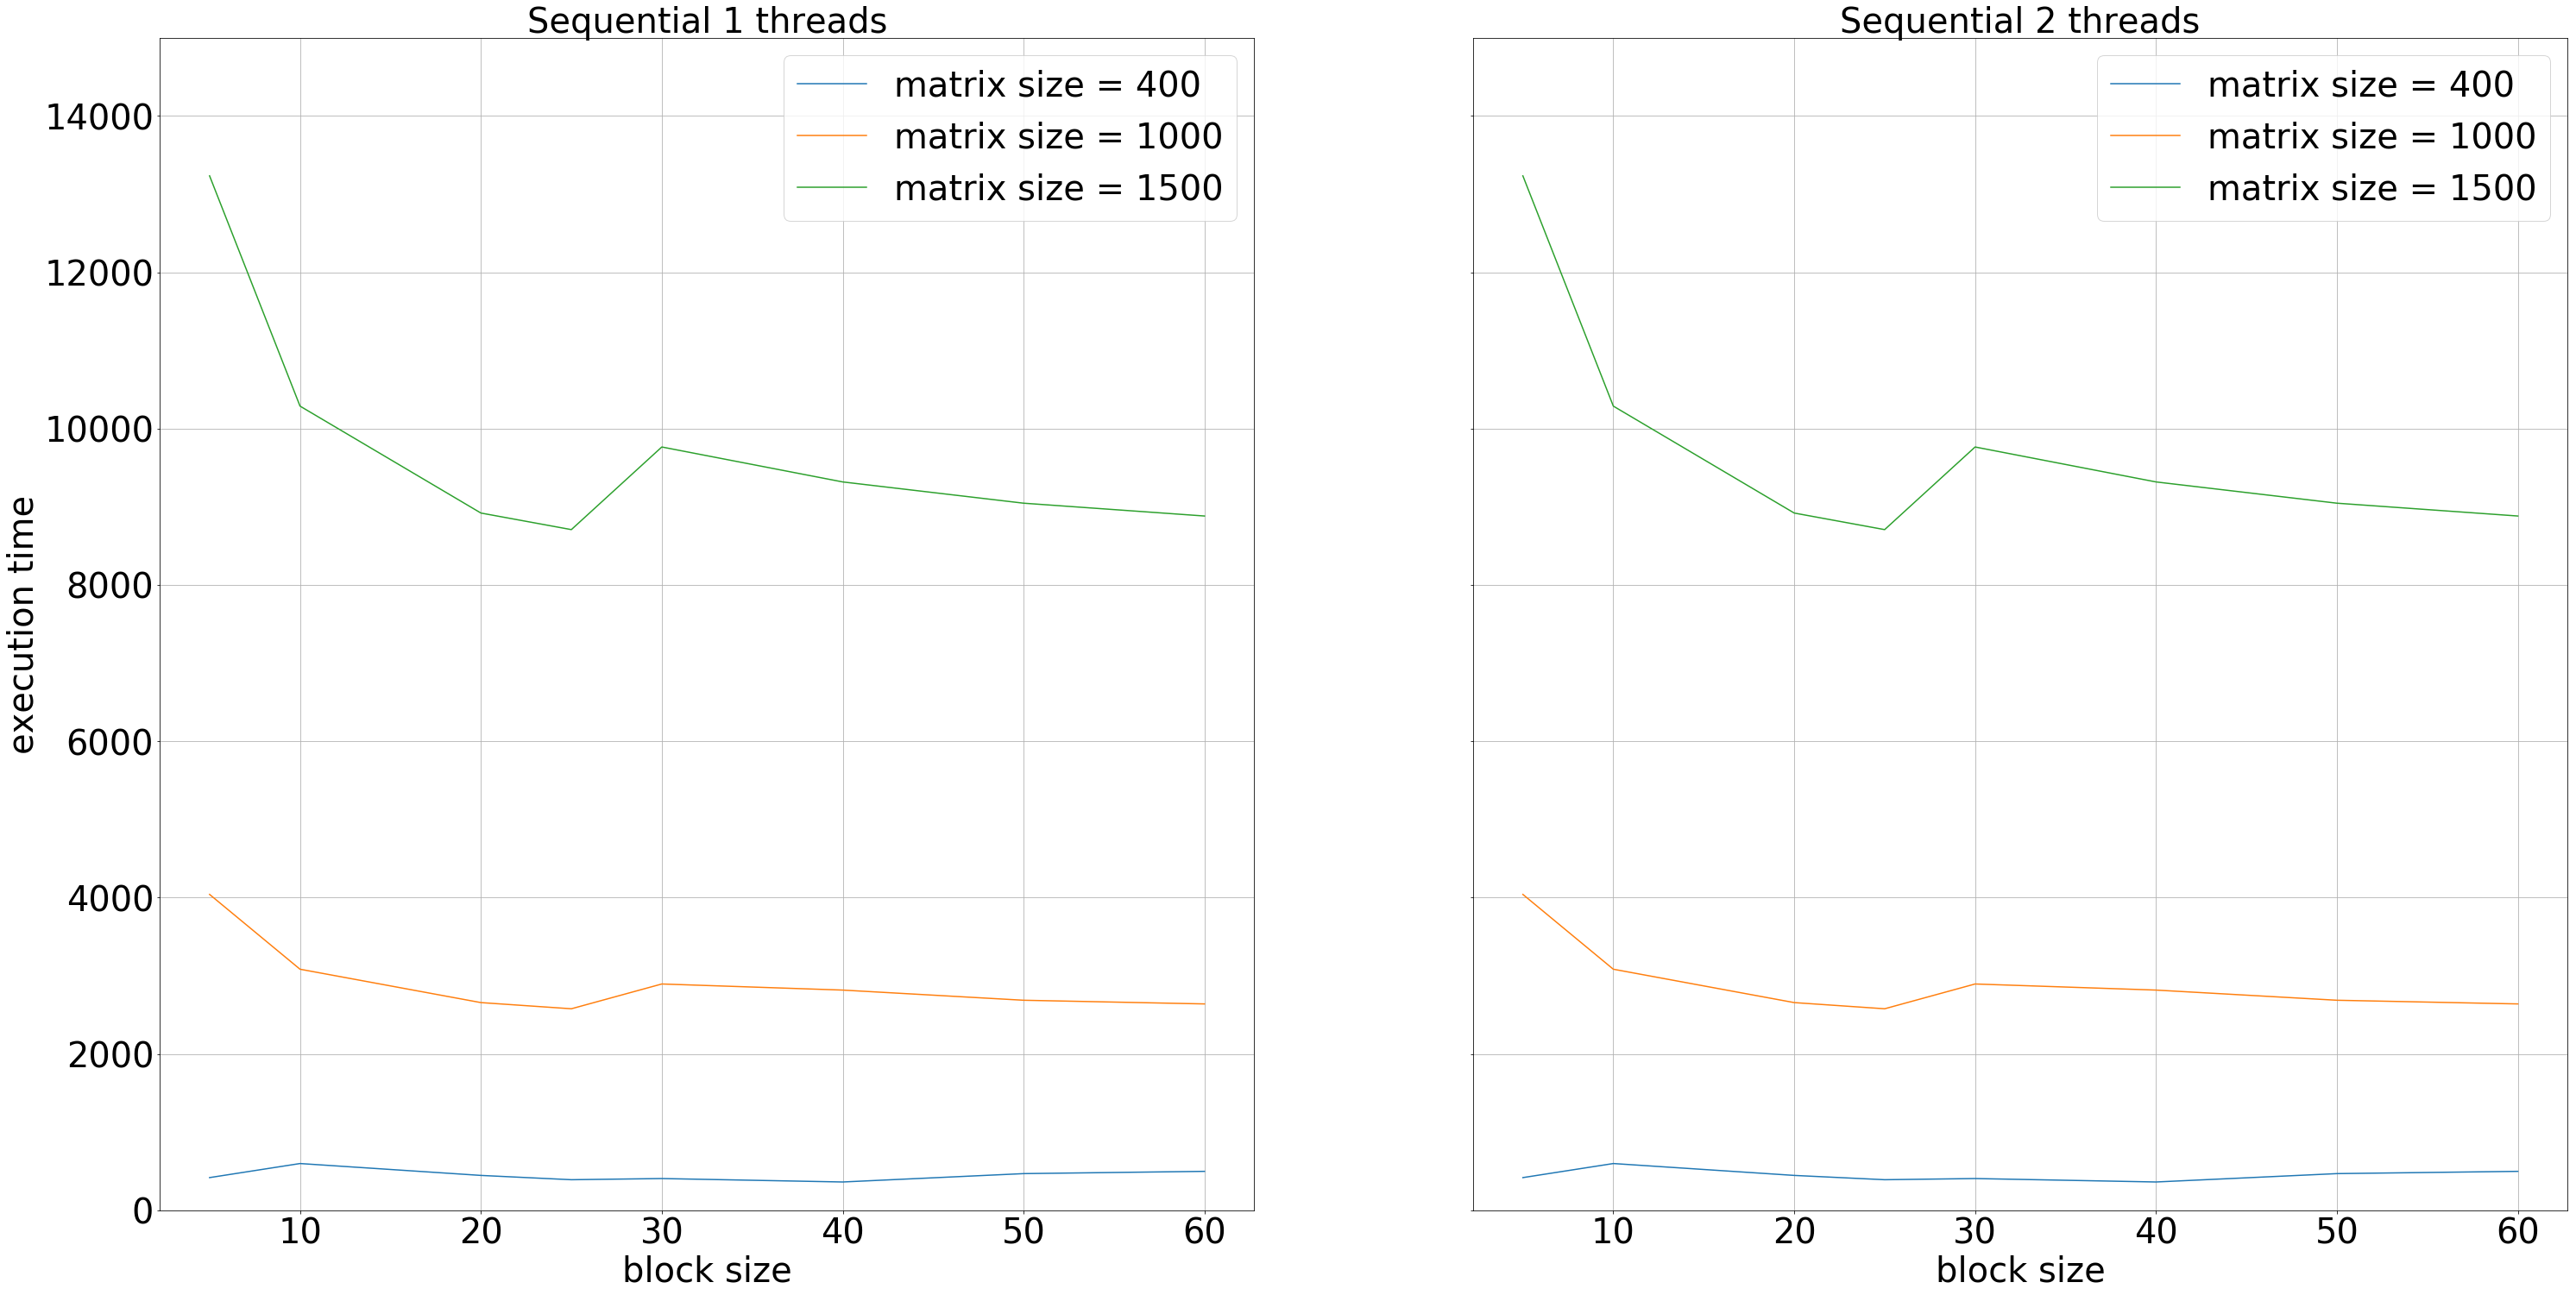

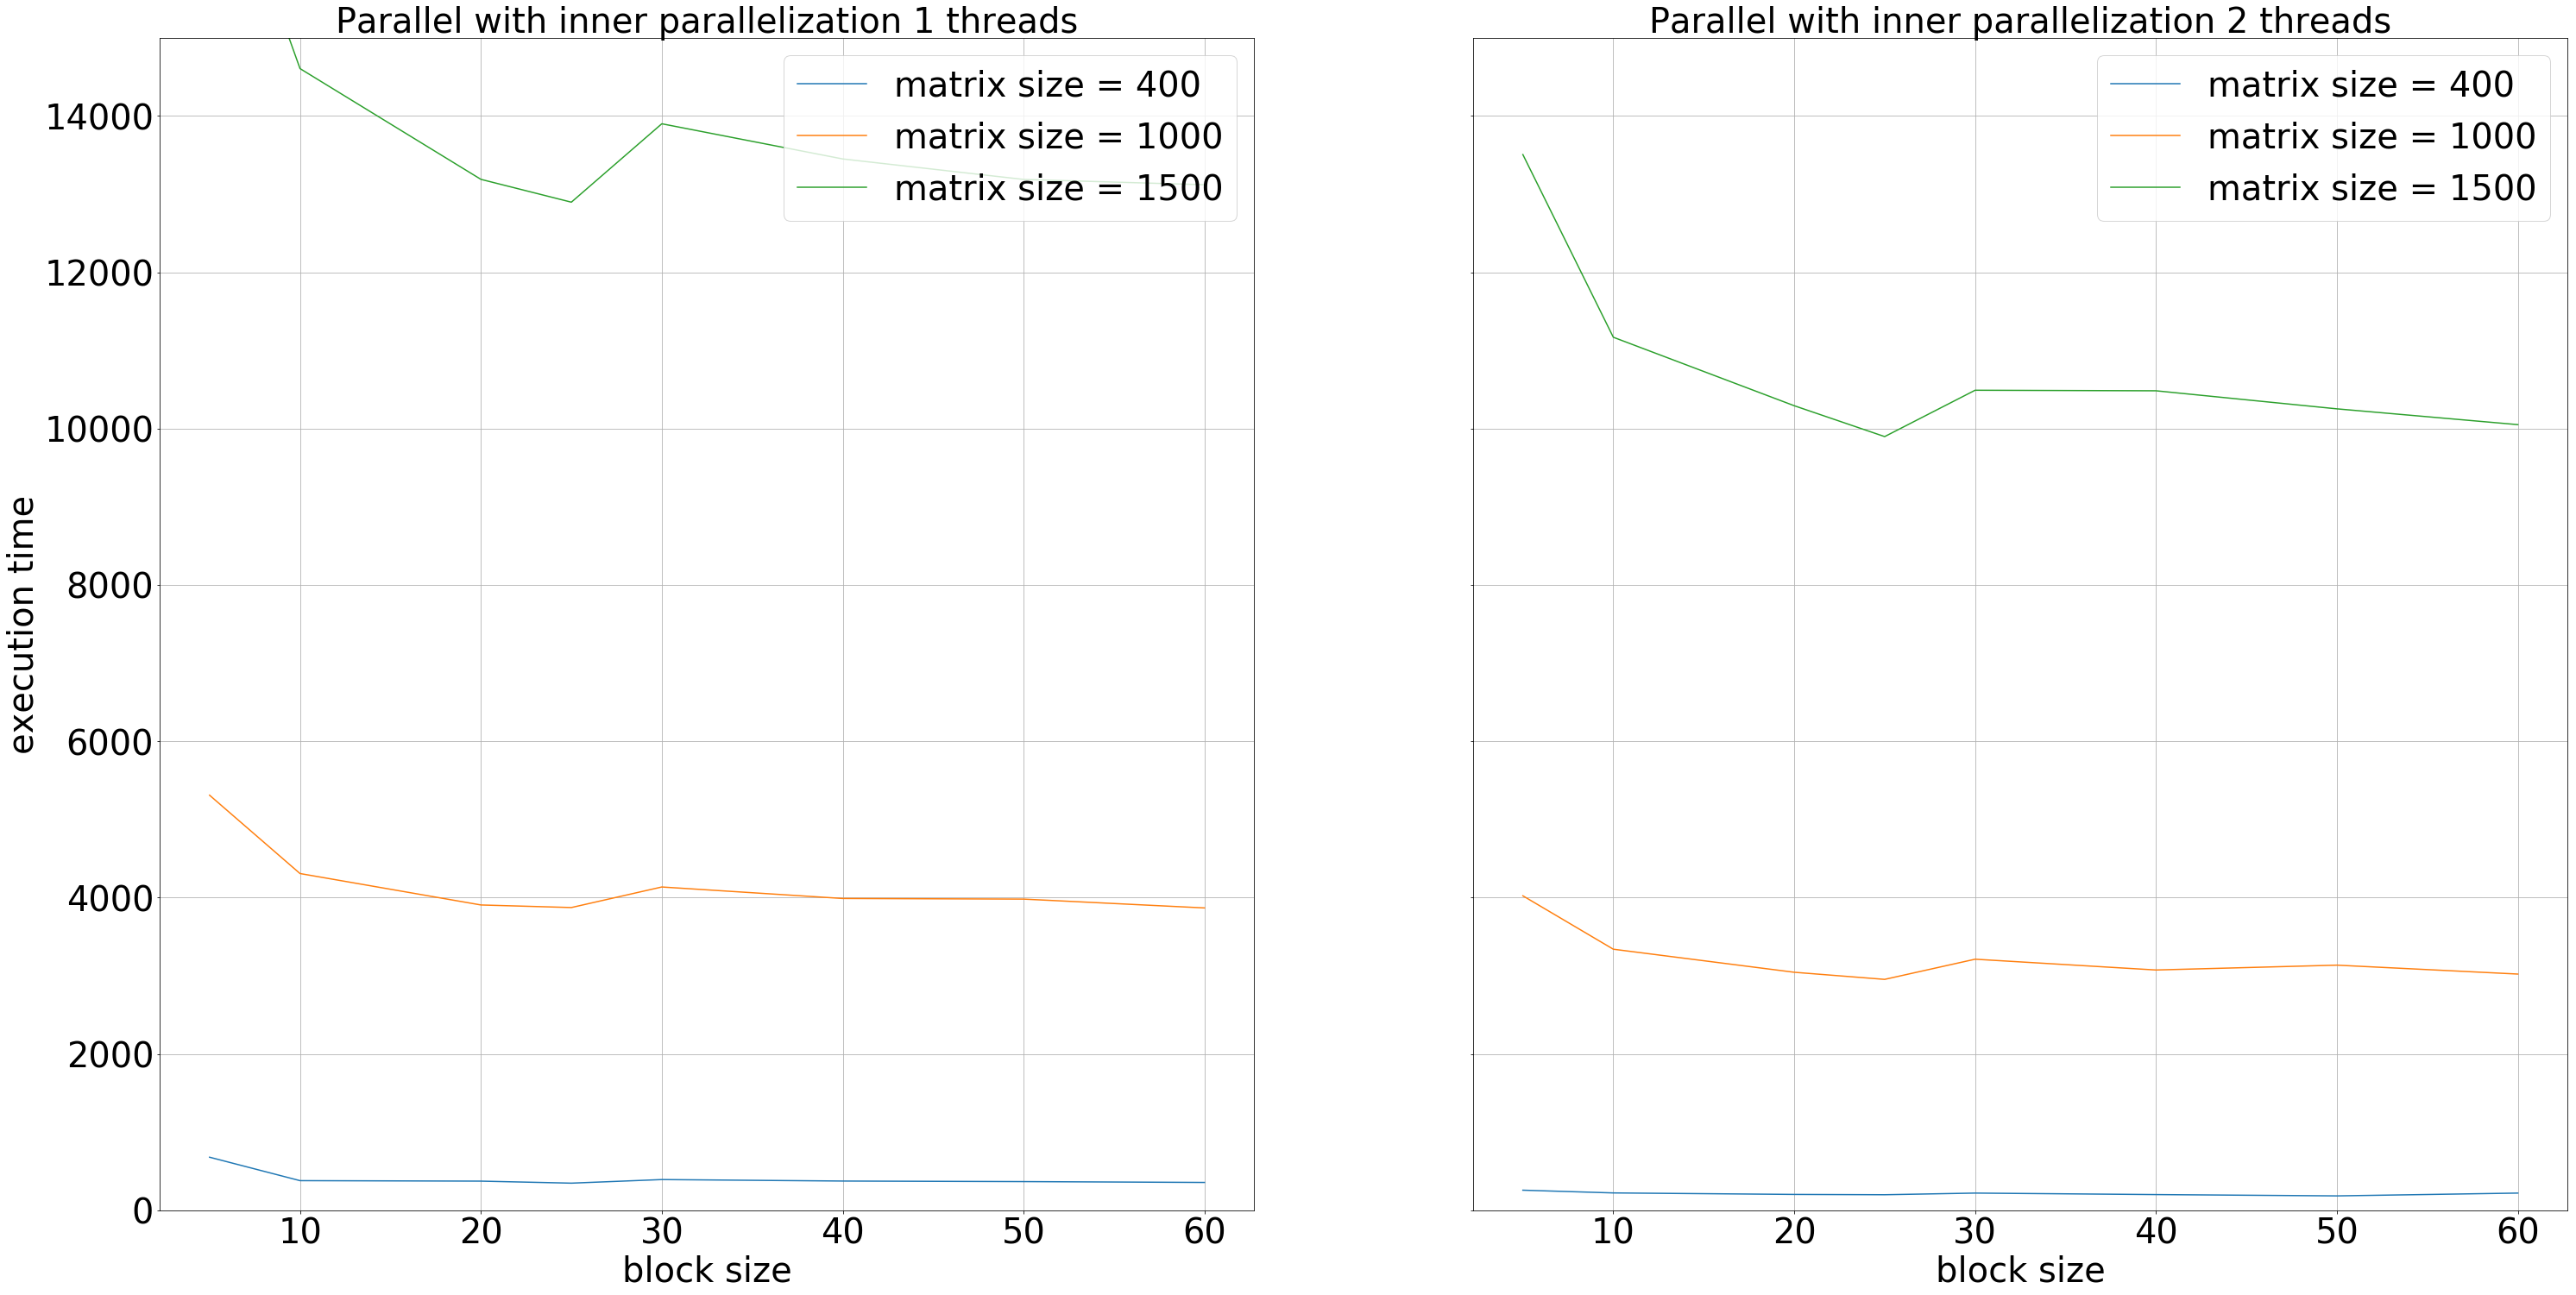

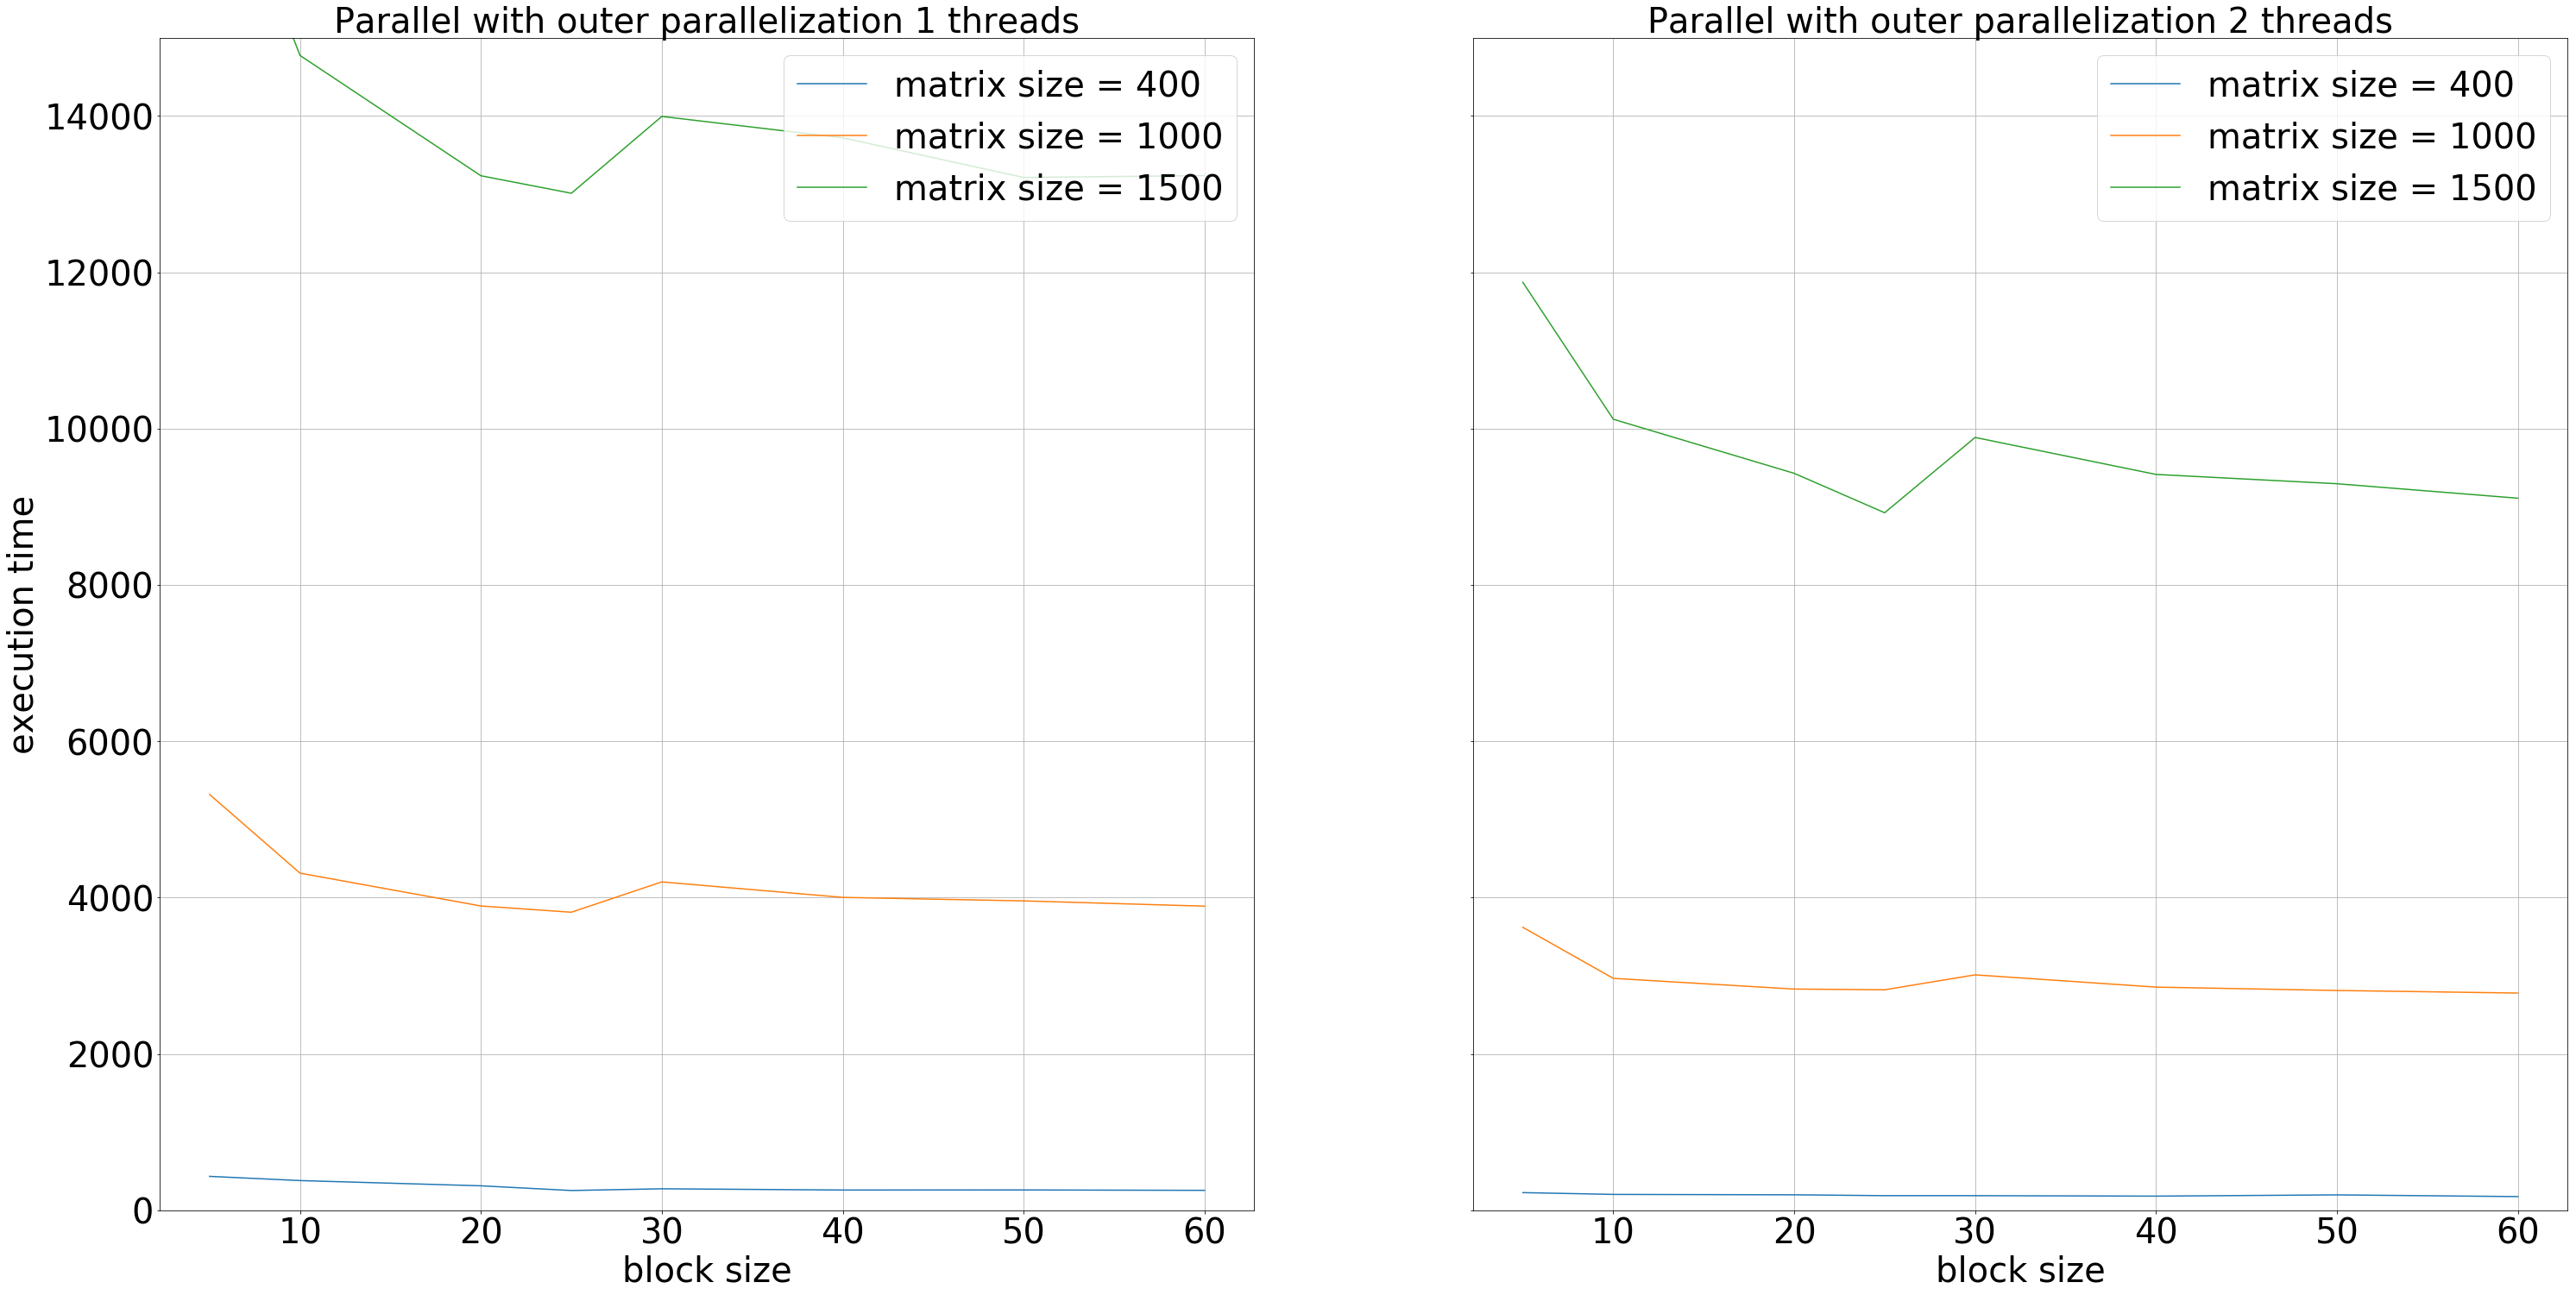

In [7]:
def plot(plot_infos, plot_titles, ylim=None, xlim=None):
    n = len(plot_infos)
    fig, axarr = plt.subplots(1, n, sharey=True)
    axarr[0].set_ylabel('execution time', fontsize=40)
    for i in range(n):
        axarr[i].grid()
        for r, axes in plot_infos[i].items():
            axarr[i].plot(axes['x'], axes['y'])
        axarr[i].legend(['matrix size = {}'.format(r) for r in plot_infos[i]], loc=1, prop={'size':40})
        axarr[i].set_title(plot_titles[i], fontsize=40)
        axarr[i].set_xlabel('block size', fontsize=40)
        if ylim:
            axarr[i].set_ylim(ylim)
        if xlim:
            axarr[i].set_xlim(xlim)
        plt.setp(axarr[i].get_xticklabels(), fontsize=40)
        plt.setp(axarr[i].get_yticklabels(), fontsize=40)
    return fig

i=0
fig = plot(
    [thr_seq[i], thr_seq[i]], 
    ['Sequential {} threads'.format(i+1), 'Sequential {} threads'.format(i+2)],
    ylim=[0, 15000]
)
fig.set_figwidth(50)
fig.set_figheight(25)
fig.savefig(str(i+1) + '_plots_seq.png')
plt.show()
fig = plot(
    [thr_par_inn[i], thr_par_inn[i+1]],
    ['Parallel with inner parallelization {} threads'.format(i+1), \
     'Parallel with inner parallelization {} threads'.format(i+2)],
    ylim=[0, 15000]
)
fig.set_figwidth(50)
fig.set_figheight(25)
fig.savefig(str(i+1) + '_plots_inn.png')
plt.show()
fig = plot(
    [thr_par_out[i], thr_par_out[i+1]],
    ['Parallel with outer parallelization {} threads'.format(i+1), \
     'Parallel with outer parallelization {} threads'.format(i+2)],
    ylim=[0, 15000]
)
fig.set_figwidth(50)
fig.set_figheight(25)
fig.savefig(str(i+1) + '_plots_out.png')
plt.show()



In [10]:
thr_pwise_seq = []
thr_pwise_par = []
thr_block_seq = []
thr_block_par_inn = []
thr_block_par_out = []
for i in range(1, 5):
    pointwise_seq = defaultdict(list)
    name = 'cmake-build-debug/' + str(i) + '_pointwise_sequential.txt'
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                 continue
            matrix_size, time = line.split(' ')
            pointwise_seq['x'].append(int(matrix_size))
            pointwise_seq['y'].append(int(time))
    thr_pwise_seq.append(pointwise_seq)
    
    pointwise_par = defaultdict(list)
    name = 'cmake-build-debug/' + str(i) + '_pointwise_parallel.txt'
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            pointwise_par['x'].append(int(matrix_size))
            pointwise_par['y'].append(int(time))
    thr_pwise_par.append(pointwise_par)
    
    block_par_inner = defaultdict(list)
    name = 'cmake-build-debug/' + str(i) + '_parallel_inner_block.txt'
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            block_par_inner['x'].append(int(matrix_size))
            block_par_inner['y'].append(int(time))
    thr_block_par_inn.append(block_par_inner)
    
    block_seq = defaultdict(list)
    name = 'cmake-build-debug/' + str(i) + '_seq_block.txt'
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            block_seq['x'].append(int(matrix_size))
            block_seq['y'].append(int(time))
    thr_block_seq.append(block_seq)
    
    block_par_outer = defaultdict(list)
    name = 'cmake-build-debug/' + str(i) + '_parallel_outer_block.txt'
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            block_par_outer['x'].append(int(matrix_size))
            block_par_outer['y'].append(int(time))
    thr_block_par_out.append(block_par_outer)
    

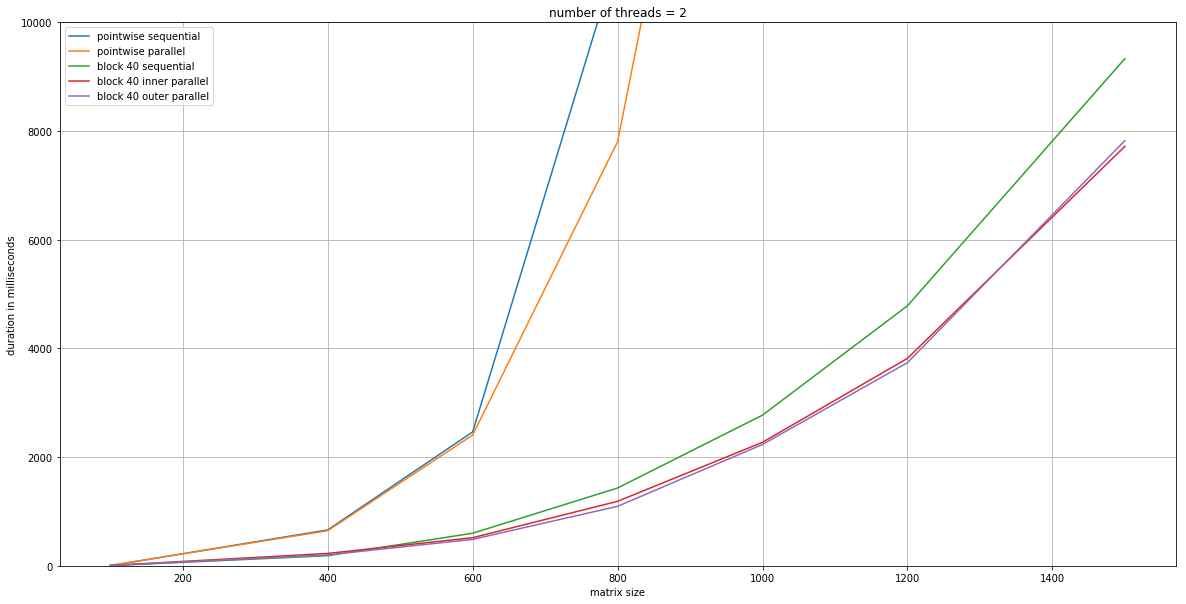

In [17]:
plt.figure(figsize=(20,10))
i = 1
plt.plot(thr_pwise_seq[i]['x'], thr_pwise_seq[i]['y'])
plt.plot(thr_pwise_par[i]['x'], thr_pwise_par[i]['y'])
plt.plot(thr_block_seq[i]['x'], thr_block_seq[i]['y'])
plt.plot(thr_block_par_inn[i]['x'], thr_block_par_inn[i]['y'])
plt.plot(thr_block_par_out[i]['x'], thr_block_par_out[i]['y'])
plt.grid()
plt.title('number of threads = {}'.format(i+1))
plt.ylabel('duration in milliseconds')
plt.xlabel('matrix size')
plt.legend([
    'pointwise sequential',
    'pointwise parallel',
    'opt block sequential',
    'opt block inner parallel',
    'opt block outer parallel',
])
plt.xlim(None)
plt.ylim([0, 10000])
# plt.savefig('pointwise_plots_with_opt_block_values.png')
plt.show()

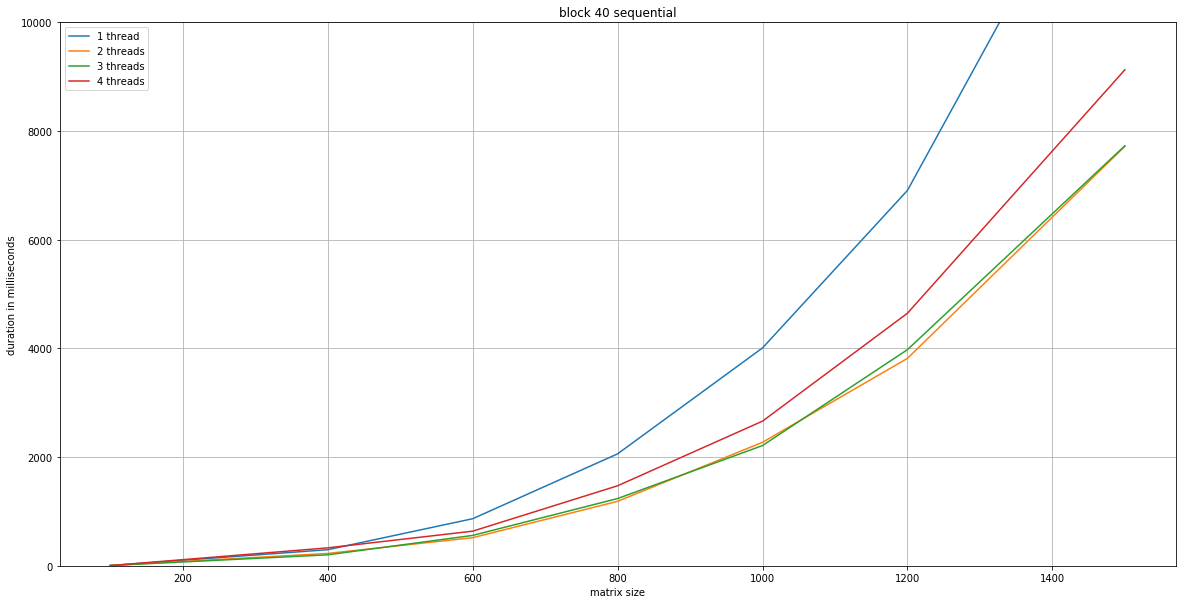

In [20]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.plot(thr_block_par_inn[i]['x'], thr_block_par_inn[i]['y'])
plt.grid()
plt.title('opt block inner parallel')
plt.ylabel('duration in milliseconds')
plt.xlabel('matrix size')
plt.legend([
    '1 thread',
    '2 threads',
    '3 threads',
    '4 threads',
])
plt.xlim(None)
plt.ylim([0, 10000])
# plt.savefig('pointwise_plots_with_opt_block_values.png')
plt.show()

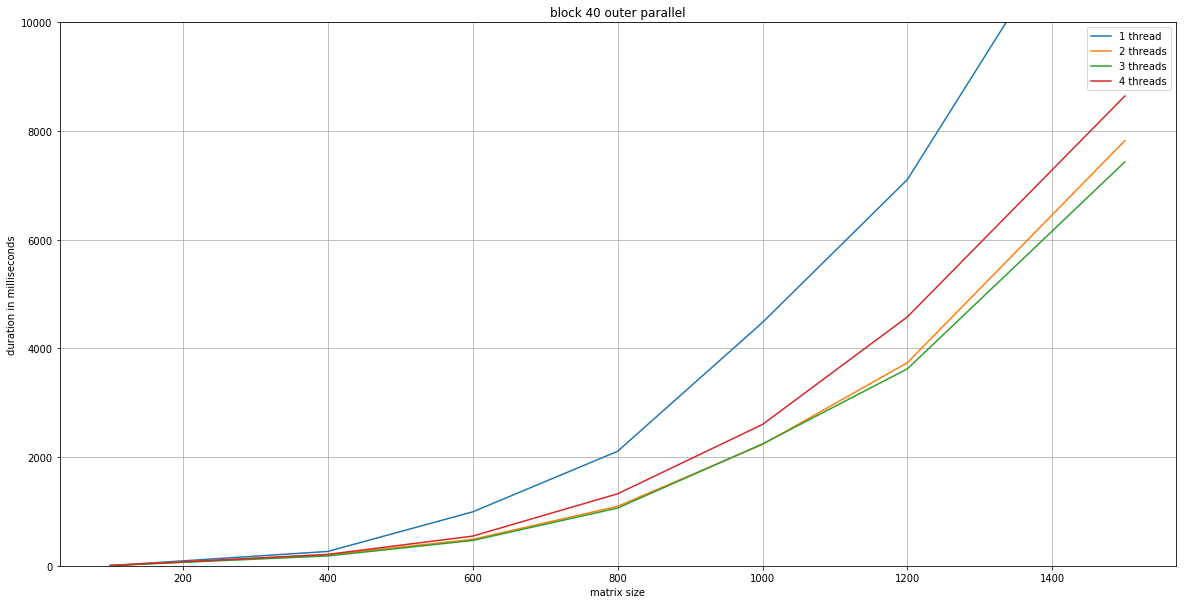

In [21]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.plot(thr_block_par_out[i]['x'], thr_block_par_out[i]['y'])
plt.grid()
plt.title('opt block outer parallel')
plt.ylabel('duration in milliseconds')
plt.xlabel('matrix size')
plt.legend([
    '1 thread',
    '2 threads',
    '3 threads',
    '4 threads',
])
plt.xlim(None)
plt.ylim([0, 10000])
# plt.savefig('pointwise_plots_with_opt_block_values.png')
plt.show()

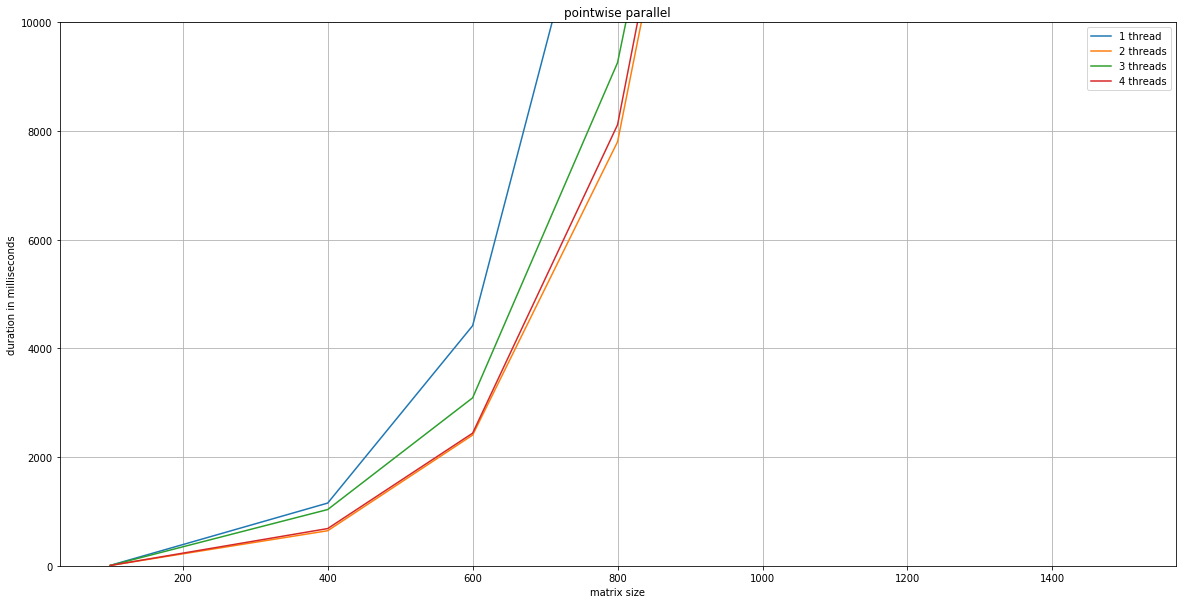

In [23]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.plot(thr_pwise_par[i]['x'], thr_pwise_par[i]['y'])
plt.grid()
plt.title('pointwise parallel')
plt.ylabel('duration in milliseconds')
plt.xlabel('matrix size')
plt.legend([
    '1 thread',
    '2 threads',
    '3 threads',
    '4 threads',
])
plt.xlim(None)
plt.ylim([0, 10000])
# plt.savefig('pointwise_plots_with_opt_block_values.png')
plt.show()